In [1]:
# Import used packages
import geopandas as gpd  # used to read the shapfile
import rasterio as rio   # used to read the raster (.tif) files
from rasterio.plot import show # used to make plots using rasterio
import matplotlib.pyplot as plt #to make plots using matplotlib

<Axes: >

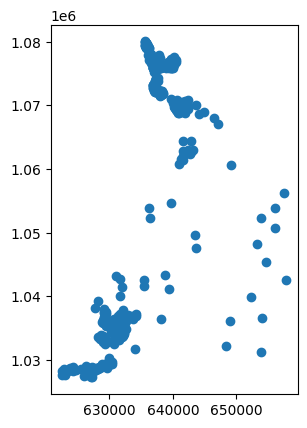

In [2]:
# Read your point shapefiles (Flooded and Non Flooded locations)
points=gpd.read_file('Point_F.shp')
points = points.to_crs('EPSG:32637') # converting to WGS84 coordinate reference system
points.plot()

In [17]:
# make columns to extract the values of each predictive feature
# for each point. 
points['DEM']=0 #
points['Slope']=0
points['Aspect']=0
points['Curvature']=0
points['Soil_Text']=0
points['CN']=0
points['TWI']=0
points['Rainfall']=0  #Max daily precipitation
points['LULC']=0

points

,id,label,geometry,DEM,Slope,Aspect,Curvature,Soil_Test,CN,TWI,Rainfall,LULC,Soil_Text
0,0,0,POINT (648355.689 1032128.503),0,0,0,0,0,0,0,0,0,0
1,1,0,POINT (652338.758 1039898.468),0,0,0,0,0,0,0,0,0,0
2,2,0,POINT (654594.349 1045368.461),0,0,0,0,0,0,0,0,0,0
3,3,0,POINT (653891.492 1031276.320),0,0,0,0,0,0,0,0,0,0
4,4,0,POINT (657859.303 1042542.024),0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,496,1,POINT (634272.168 1036892.731),0,0,0,0,0,0,0,0,0,0
389,497,1,POINT (634203.006 1037288.382),0,0,0,0,0,0,0,0,0,0
390,498,1,POINT (632194.606 1037854.806),0,0,0,0,0,0,0,0,0,0
391,499,1,POINT (635526.358 1042630.752),0,0,0,0,0,0,0,0,0,0


In [18]:
#The predictive features are in raster format so we use rasterio package to 
#read them and convert them to numpy array

DEM_raster=rio.open('DEM.tif')
DEM_arr=DEM_raster.read(1)

Slope_raster=rio.open('Slope.tif')
Slope_arr=Slope_raster.read(1)

Aspect_raster=rio.open('Aspect.tif')
Aspect_arr=Aspect_raster.read(1)

Curvature_raster=rio.open('Curvature.tif')
Curvature_arr=Curvature_raster.read(1)

SoilText_raster=rio.open('Soil_Text.tif')
SoilText_arr=SoilText_raster.read(1)

CN_raster=rio.open('CN.tif')
CN_arr=CN_raster.read(1)

TWI_raster=rio.open('TWI.tif')
TWI_arr=TWI_raster.read(1)

AP_raster=rio.open('Rainfall.tif')
AP_arr=AP_raster.read(1)

LULC_raster=rio.open('LULC.tif')
LULC_arr=LULC_raster.read(1)


<Axes: >

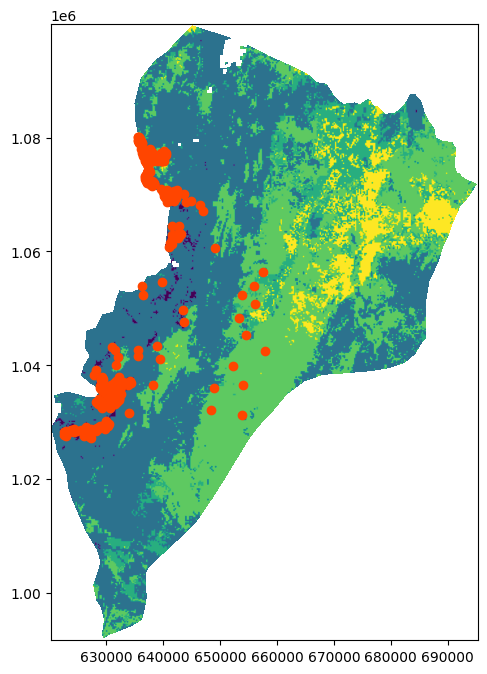

In [19]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(8,8))
points.plot(ax=ax, color='orangered')
show(SoilText_raster, ax=ax)

In [20]:
SoilText_arr.size

51988636

In [21]:
LULC_arr.size


51988636

In [22]:
# Extracting the raster values to the points shapefile
# count=0
for index,row in points.iterrows(): #iterate over the points in the shapefile
    longitude=row['geometry'].x #get the longitude of the point
    latitude=row['geometry'].y  #get the latitude of the point

    

    rowIndex, colIndex=DEM_raster.index(longitude,latitude) # the corresponding pixel to the point (longitude,latitude)

    # Extract the raster values at the point location
    points["DEM"].loc[index]=DEM_arr[rowIndex, colIndex]
    points["Slope"].loc[index]=Slope_arr[rowIndex, colIndex]
    points["Aspect"].loc[index]=Aspect_arr[rowIndex, colIndex]
    points["Curvature"].loc[index]=Curvature_arr[rowIndex, colIndex]
    points["Soil_Text"].loc[index]=SoilText_arr[rowIndex, colIndex]
    points["CN"].loc[index]=CN_arr[rowIndex, colIndex]
    points["TWI"].loc[index]=TWI_arr[rowIndex, colIndex]
    points["Rainfall"].loc[index]=AP_arr[rowIndex, colIndex]
    points["LULC"].loc[index]=LULC_arr[rowIndex, colIndex]


/tmp/ipykernel_3188/2379415386.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  points["DEM"].loc[index]=DEM_arr[rowIndex, colIndex]
/tmp/ipykernel_3188/2379415386.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [23]:
points # to have a look on the calculated fields.

,id,label,geometry,DEM,Slope,Aspect,Curvature,Soil_Test,CN,TWI,Rainfall,LULC,Soil_Text
0,0,0,POINT (648355.689 1032128.503),810,4.124518,56.309933,1.28,0,71,7.651444,8.634620,30,7
1,1,0,POINT (652338.758 1039898.468),798,1.811248,288.434937,-0.64,0,71,6.457982,9.113000,30,7
2,2,0,POINT (654594.349 1045368.461),783,2.429397,45.000000,-1.28,0,71,8.626627,14.380471,30,7
3,3,0,POINT (653891.492 1031276.320),845,0.810231,225.000000,-0.00,0,71,11.018336,9.009209,30,7
4,4,0,POINT (657859.303 1042542.024),803,1.811248,108.434952,-0.64,0,71,7.151129,11.598495,30,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,496,1,POINT (634272.168 1036892.731),719,0.000000,-9999.000000,-0.00,0,30,9.554776,10.237988,90,1
389,497,1,POINT (634203.006 1037288.382),720,1.811248,161.565048,-0.64,0,30,6.938687,10.237988,30,1
390,498,1,POINT (632194.606 1037854.806),721,0.000000,-9999.000000,-0.00,0,58,7.469123,10.237988,40,4
391,499,1,POINT (635526.358 1042630.752),715,0.000000,-9999.000000,-0.00,0,58,14.062859,14.165248,90,4


In [24]:
# Save the points file
points.to_file('points_data.shp') # save as a shapfile 

In [25]:
# or
points.to_pickle('points_data.pkl') # save as a pickle.